In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from folium import plugins
from folium.plugins import HeatMapWithTime
import folium
import geopandas as gpd
from folium.plugins import HeatMap
%matplotlib inline

/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [29]:
import pyepsg

In [43]:
mass_county = gpd.GeoDataFrame.from_file('Massachusetts_Counties/Massachusetts_Counties.shp')

In [2]:
mass_city_pos_mosquito=pd.read_csv('data/EEEVdata/mass_city_pos_mosquito.csv')


In [45]:
mass_county.head(2)

,OBJECTID,FIPS_STCO,COUNTY,geometry
0,1,25001,BARNSTABLE,(POLYGON ((-70.52640376158593 41.5729261016680...
1,2,25003,BERKSHIRE,POLYGON ((-73.02371062047774 42.70269847054067...


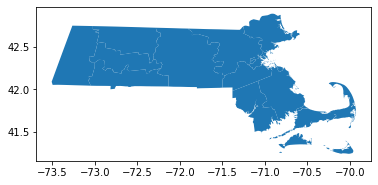

In [46]:
mass_county.plot()

In [5]:
mass_city_pos_mosquito['positive_mosquitoes'].max()

46

In [47]:
mass_map=folium.Map(location=[41.9120,-70.7168],zoom_start=9)


In [40]:
folium.GeoJson(mass_county,name='geojson').add_to(mass_map)


In [49]:
#heatmap of pos mosquito by city
folium.GeoJson(mass_county).add_to(mass_map)

HeatMap(data=mass_city_pos_mosquito[['latitude', 'longitude', 'positive_mosquitoes']], radius=25, max_val=40,max_zoom=6,blur=15).add_to(mass_map)
mass_map.save('mass_pos_city_heatmap2.html')

In [16]:
mich_pos_map=pd.read_excel('data/EEEVdata/mich_pos_map.xlsx')


In [17]:
mich_pos_map

,County,animal_cases,latitude,longitude
0,Allegan,2,42.5710,-86.3377
1,Barry,5,42.5354,-85.3550
2,Berrien,1,42.0321,-86.7416
3,Calhoun,3,42.2074,-85.0233
4,Cass,4,41.9299,-86.0122
5,Eaton,1,42.5886,-84.7733
6,Genesee,1,43.0777,-83.6774
7,Houghton,1,47.1211,-88.5694
8,Jackson,5,42.1764,-84.3542
9,Kalamazoo,9,42.2278,-85.5200


In [3]:
mich_county = gpd.GeoDataFrame.from_file('Michigan_Counties/Counties_v17a.shp')

In [56]:
mich_gjson=mich_county.to_crs(epsg='4326').to_json()

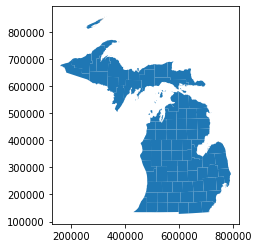

In [58]:
mich_county.plot()

In [45]:
mich_map=folium.Map(location=[42.2278,-85.5200],zoom_start=6)

#heatmap of positive animals for EEEV in michigan counties.
#folium.GeoJson(mich_county).add_to(mich_map)


HeatMap(data=mich_pos_map[['latitude', 'longitude', 'animal_cases']], radius=22, max_val=1,max_zoom=11,blur=7).add_to(mich_map)
mich_map.save('mich_pos_county_heatmap2.html')

In [63]:
HeatMap(data=mich_pos_map[['latitude', 'longitude', 'animal_cases']], radius=15, max_val=5,max_zoom=8,blur=15).add_to(mich_map)
mich_map.save('mich_pos_county_heatmap3.html')

In [81]:
ny_pos_map=pd.read_excel('data/new_york_eee_map.xlsx')

In [93]:
ny_county=gpd.GeoDataFrame.from_file('data/birds/ebd_US_mutswa_201001_201912_relNov-2019/ny_counties/State.shp')

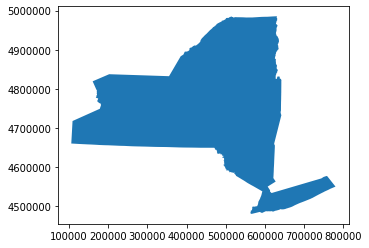

In [94]:
ny_county.plot()

In [96]:
ny_map=folium.Map(location=[40.7128,-74.0060],zoom_start=7)
folium.GeoJson(ny_county,name='geojson').add_to(ny_map)

HeatMap(data=ny_pos_map[['Latitude', 'Longitude', 'Pos_count']], radius=26, max_val=2,max_zoom=7,blur=15).add_to(ny_map)
ny_map.save('ny_heatmap_eee_pos2.html')